# Last Mile Logistics Auditor
### Client: Veridi Logistics

This notebook analyzes delivery performance using the Olist Brazilian E-Commerce dataset.  
The objective is to evaluate delivery delays, identify regional performance gaps, and assess the relationship between delivery delays and customer sentiment.


In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look clean
plt.style.use("seaborn-v0_8")

# Show all columns when inspecting data
pd.set_option('display.max_columns', None)


In [11]:
# Load datasets
orders = pd.read_csv("olist_orders_dataset.csv")
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")
products = pd.read_csv("olist_products_dataset.csv")

# Quick preview
orders.head(), reviews.head(), customers.head(), products.head()



(                           order_id                       customer_id  \
 0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
 1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
 2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
 3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
 4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
 
   order_status order_purchase_timestamp    order_approved_at  \
 0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
 1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
 2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
 3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
 4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
 
   order_delivered_carrier_date order_delivered_customer_date  \
 0          2017-10-04 19:55:00           2017-10-10 21:25:13   
 1          2018-07-26 14:31:00 

In [12]:
# Inspect columns to understand join keys
print("Orders columns:")
print(orders.columns, "\n")

print("Reviews columns:")
print(reviews.columns, "\n")

print("Customers columns:")
print(customers.columns, "\n")


Orders columns:
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object') 

Reviews columns:
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object') 

Customers columns:
Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object') 



In [13]:
# Join orders with reviews (LEFT JOIN to keep all orders)
orders_reviews = orders.merge(
    reviews,
    on="order_id",
    how="left"
)

# Join the result with customers
master_df = orders_reviews.merge(
    customers,
    on="customer_id",
    how="left"
)

# Check result
master_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [14]:
# Convert date columns to datetime
date_cols = [
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
]

for col in date_cols:
    master_df[col] = pd.to_datetime(master_df[col], errors="coerce")

# Create delivery delay (in days)
master_df["days_difference"] = (
    master_df["order_delivered_customer_date"]
    - master_df["order_estimated_delivery_date"]
).dt.days

master_df[[
    "order_id",
    "order_estimated_delivery_date",
    "order_delivered_customer_date",
    "days_difference"
]].head()


,order_id,order_estimated_delivery_date,order_delivered_customer_date,days_difference
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-18,2017-10-10 21:25:13,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-08-13,2018-08-07 15:27:45,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-09-04,2018-08-17 18:06:29,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-12-15,2017-12-02 00:28:42,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-26,2018-02-16 18:17:02,-10.0


In [15]:
# Function to classify delivery status
def classify_delivery(days):
    if pd.isna(days):
        return "Not Delivered"
    elif days <= 0:
        return "On Time"
    elif days <= 5:
        return "Late"
    else:
        return "Super Late"

# Apply classification
master_df["delivery_status"] = master_df["days_difference"].apply(classify_delivery)

# Check distribution
master_df["delivery_status"].value_counts()


delivery_status
On Time          90442
Super Late        3786
Not Delivered     2987
Late              2777
Name: count, dtype: int64

In [16]:
# Filter only delivered orders
delivered_df = master_df[
    master_df["delivery_status"].isin(["Late", "Super Late", "On Time"])
]

# Create late flag
delivered_df["is_late"] = delivered_df["delivery_status"].isin(["Late", "Super Late"])

# Group by state
state_performance = (
    delivered_df
    .groupby("customer_state")
    .agg(
        total_orders=("order_id", "count"),
        late_orders=("is_late", "sum")
    )
)

# Calculate percentage of late deliveries
state_performance["late_percentage"] = (
    state_performance["late_orders"] / state_performance["total_orders"] * 100
)

# Sort worst states first
state_performance = state_performance.sort_values(
    by="late_percentage",
    ascending=False
)

state_performance.head()


C:\Users\BI-TECH\AppData\Local\Temp\ipykernel_2576\4257724301.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivered_df["is_late"] = delivered_df["delivery_status"].isin(["Late", "Super Late"])


,total_orders,late_orders,late_percentage
customer_state,,,
AL,401,86,21.446384
MA,721,125,17.337032
SE,335,51,15.223881
PI,477,66,13.836478
CE,1282,177,13.806552


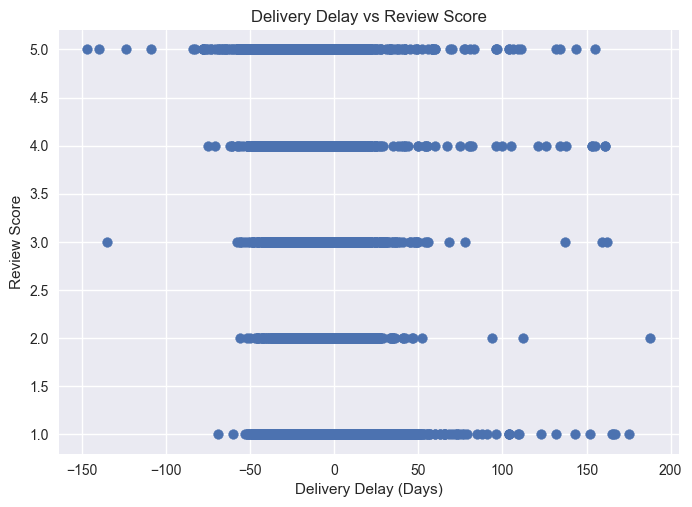

In [17]:
# Average review score per delivery status
review_analysis = (
    master_df
    .groupby("delivery_status")["review_score"]
    .mean()
    .sort_values()
)

review_analysis

# Remove missing delay values
delay_review_df = master_df.dropna(subset=["days_difference", "review_score"])

# Correlation
correlation = delay_review_df["days_difference"].corr(delay_review_df["review_score"])

correlation


plt.figure()
plt.scatter(delay_review_df["days_difference"], delay_review_df["review_score"])
plt.xlabel("Delivery Delay (Days)")
plt.ylabel("Review Score")
plt.title("Delivery Delay vs Review Score")
plt.show()


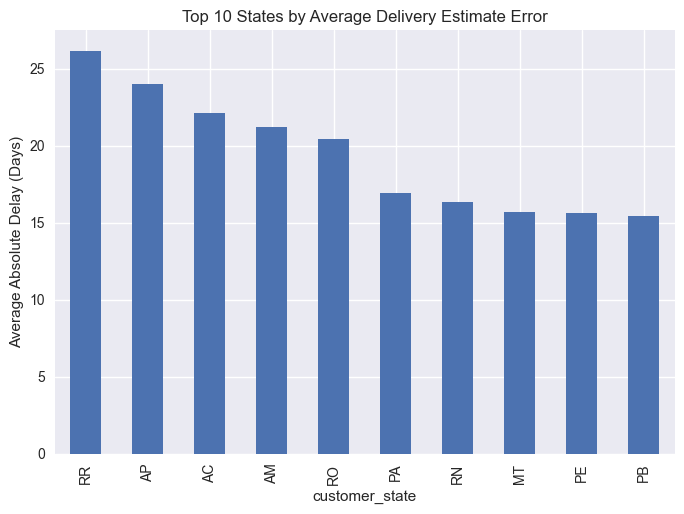

In [18]:
# Absolute delivery error (how wrong the estimate was)
master_df["absolute_delay"] = master_df["days_difference"].abs()

# Remove missing values
accuracy_df = master_df.dropna(subset=["absolute_delay"])

# Average error per state
state_accuracy = (
    accuracy_df
    .groupby("customer_state")["absolute_delay"]
    .mean()
    .sort_values(ascending=False)
)

state_accuracy.head()


plt.figure()
state_accuracy.head(10).plot(kind="bar")
plt.title("Top 10 States by Average Delivery Estimate Error")
plt.ylabel("Average Absolute Delay (Days)")
plt.show()


In [19]:
# Export cleaned and engineered dataset for dashboard
master_df.to_csv("master_dataset.csv", index=False)

print("Dataset exported successfully.")


Dataset exported successfully.
